In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install xgboost==1.3.1

In [ ]:
loan_data  = pd.read_csv("loan_train.csv" )

In [ ]:
test_data = pd.read_csv('loan_test.csv')

In [ ]:
loan_data.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
5,5,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,0
6,6,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,0
7,7,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,1
8,8,LP001859,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural,0
9,9,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,0


In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [ ]:
loan_data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [ ]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [ ]:
loan_data.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [ ]:
loan_data['Unnamed: 0'].nunique()

491

In [ ]:
loan_data.Gender.value_counts()

Male      393
Female     88
Name: Gender, dtype: int64

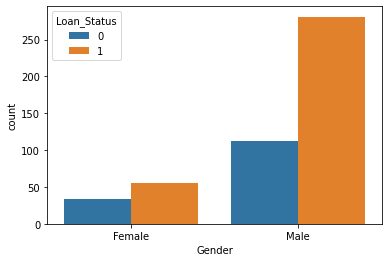

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

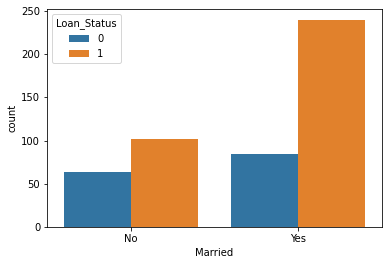

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [ ]:
loan_data.drop('Loan_ID', inplace=True, axis=1)
test_data.drop('Loan_ID', inplace=True, axis=1)

In [ ]:
loan_data.drop('Unnamed: 0', inplace=True, axis=1)

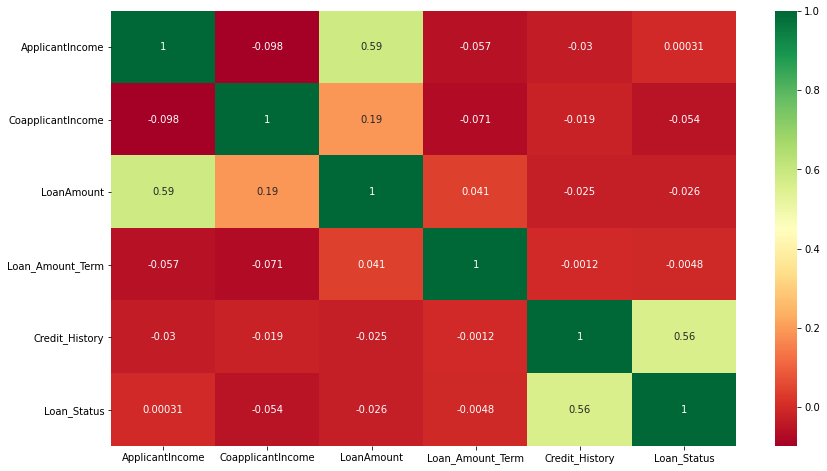

In [ ]:
#Plotting correlation
corrmat= loan_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(loan_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
num_cols = loan_data.select_dtypes(include=np.number).columns

loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].mean())

In [ ]:
cat_cols = loan_data.select_dtypes(include = 'object').columns

loan_data[cat_cols] = loan_data[cat_cols].fillna(loan_data[cat_cols].mode())

In [ ]:
loan_data.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer 

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(loan_data[['Gender']])
loan_data[['Gender']] = mode_imputer.transform(loan_data[['Gender']]).ravel()

In [ ]:
mode_imputer = mode_imputer.fit(loan_data[['Married']])
loan_data[['Married']] = mode_imputer.transform(loan_data[['Married']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Dependents']])
loan_data[['Dependents']] = mode_imputer.transform(loan_data[['Dependents']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Self_Employed']])
loan_data[['Self_Employed']] = mode_imputer.transform(loan_data[['Self_Employed']]).ravel()

In [ ]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [ ]:
num_colst = test_data.select_dtypes(include=np.number).columns

test_data[num_colst] = test_data[num_colst].fillna(test_data[num_colst].mean())

In [ ]:
cat_colst = test_data.select_dtypes(include = 'object').columns

test_data[cat_colst] = test_data[cat_colst].fillna(test_data[cat_colst].mode())

In [ ]:
test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(test_data[['Gender']])
test_data[['Gender']] = mode_imputer.transform(test_data[['Gender']]).ravel()

In [ ]:
mode_imputer = mode_imputer.fit(test_data[['Married']])
test_data[['Married']] = mode_imputer.transform(test_data[['Married']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Dependents']])
test_data[['Dependents']] = mode_imputer.transform(test_data[['Dependents']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Self_Employed']])
test_data[['Self_Employed']] = mode_imputer.transform(test_data[['Self_Employed']]).ravel()

In [ ]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
loan_data = pd.get_dummies(loan_data, columns=cat_cols)
loan_data.shape
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.000000,1.0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.000000,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.000000,1.0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,341.297071,1.0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.000000,1.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
test_data = pd.get_dummies(test_data, columns=cat_colst)
test_data.shape
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3748,1668.0,110.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0
1,4000,7750.0,290.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,2625,6250.0,187.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
3,3902,1666.0,109.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0
4,6096,0.0,218.0,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0


In [ ]:
test_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

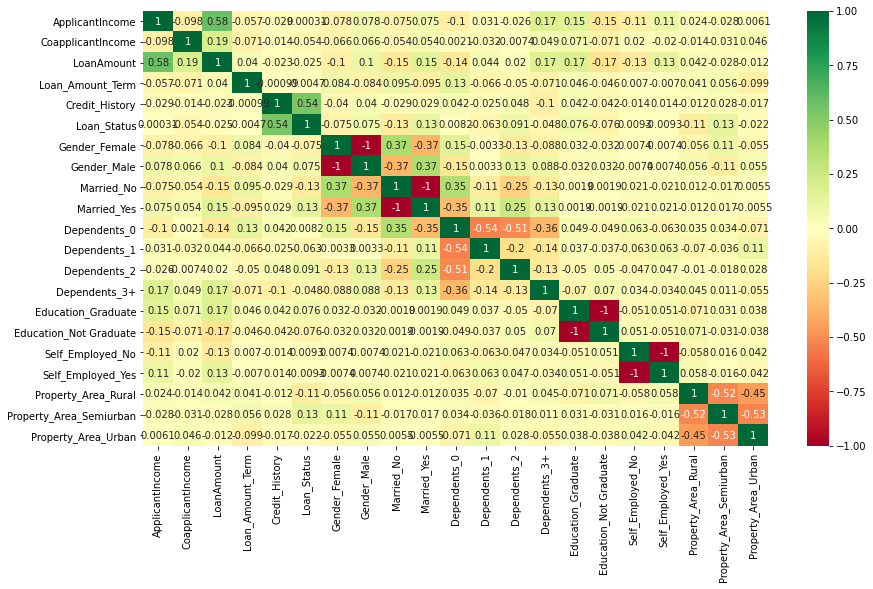

In [ ]:
#Plotting correlation
corrmat= loan_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(loan_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
loan_data.shape, test_data.shape

((491, 21), (123, 20))

In [ ]:
y_train = loan_data['Loan_Status']

In [ ]:
X_train = loan_data
X_train.drop(columns='Loan_Status', inplace=True)
X_train.shape

(491, 20)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = 0, max_depth=2, n_estimators=100, learning_rate = 0.05, min_child_weight= 3)
xgb_model.fit(X_train, y_train)

[11:01:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Feature Importances :  [0.03946672 0.08256008 0.04387981 0.03451815 0.4595935  0.
 0.         0.06363528 0.         0.         0.06110645 0.04000716
 0.         0.03506068 0.         0.         0.         0.06693023
 0.07324192 0.        ]


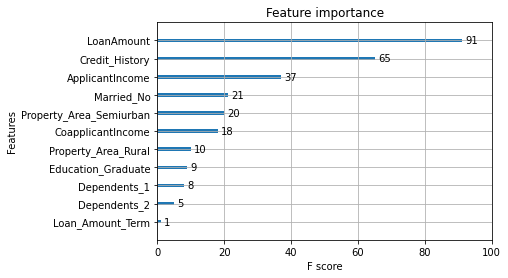

In [ ]:
from xgboost import plot_importance

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [ ]:
grid_search_1 = GridSearchCV(estimator = xgb_model, param_grid = param_grid, 
                         cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search_1.fit(X_train, y_train)

In [ ]:
grid_search_1.best_params_

In [ ]:
best_grid = grid_search_1.best_estimator_

In [ ]:
y_pred = xgb_model.predict(test_data)

In [ ]:
pd.Series(y_pred).value_counts()

1    102
0     21
dtype: int64

In [ ]:
#import joblib
#save model
#joblib.dump(xgb_model, 'xgb_jobmodel.pkl')

['xgb_jobmodel.pkl']

In [ ]:
xgb_model.save_model('xgb_model.json')

In [ ]:
import pickle
pkl_file = "pkl_xgb_model.pkl"

pickle.dump(xgb_model, open(pkl_file, 'wb'))